In [15]:
# Make train and test datasets
from sklearn.cross_validation import train_test_split
import numpy as np

In [16]:
import pandas as pd
X=pd.read_csv("train.csv")
Y=pd.read_csv("test.csv")

In [17]:
X.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [18]:
train_df=X.copy()
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [19]:
test_df=Y.copy()
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [20]:
train_df[train_df["Loan_Status"]=="Y"]=1

In [21]:
train_df[train_df["Loan_Status"]=="N"]=0
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1,1,1,1,1,1.0,1.0,1.0,1.0,1,1
1,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0
2,1,1,1,1,1,1,1,1.0,1.0,1.0,1.0,1,1
3,1,1,1,1,1,1,1,1.0,1.0,1.0,1.0,1,1
4,1,1,1,1,1,1,1,1.0,1.0,1.0,1.0,1,1


In [22]:
train_df["Loan_Status"].convert_objects(convert_numeric=True)

/home/rishikesh/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


0      1
1      0
2      1
3      1
4      1
5      1
6      1
7      0
8      1
9      0
10     1
11     1
12     1
13     0
14     1
15     1
16     1
17     0
18     0
19     1
20     0
21     1
22     0
23     0
24     0
25     1
26     1
27     1
28     0
29     1
      ..
584    0
585    0
586    1
587    1
588    1
589    0
590    1
591    0
592    1
593    1
594    1
595    1
596    0
597    0
598    1
599    1
600    0
601    1
602    1
603    1
604    1
605    0
606    1
607    1
608    1
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, dtype: int64

In [23]:
train=train_df.copy()

In [24]:
y=train_df.Loan_Status.copy()
train_df=X.drop('Loan_Status',1)
train_df=train_df.drop('Loan_ID',1)
testId=test_df["Loan_ID"]
test_df=test_df.drop("Loan_ID",1)
train_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [25]:
from sklearn import preprocessing

for feat in train_df.columns:
    if train_df[feat].dtype == 'object':
        y=X.Loan_Status
        lbl = preprocessing.LabelEncoder()
        lbl.fit(np.unique(list(train_df[feat].values) + list(test_df[feat].values)))
        train_df[feat]   = lbl.transform(list(train_df[feat].values))
        test_df[feat]  = lbl.transform(list(test_df[feat].values))

# remove constant columns
remove = []
for col in train_df.columns:
    if train_df[col].std() == 0:
        remove.append(col)

train_df.drop(remove, axis=1, inplace=True)
test_df.drop(remove, axis=1, inplace=True)

# remove duplicated columns
remove = []
c = train_df.columns
for i in range(len(c)-1):
    v = train_df[c[i]].values
    for j in range(i+1,len(c)):
        if np.array_equal(v,train_df[c[j]].values):
            remove.append(c[j])

train_df.drop(remove, axis=1, inplace=True)
test_df.drop(remove, axis=1, inplace=True)


for feat in train_df.columns:
    if train_df[feat].dtype == 'float64':
        train_df[feat][np.isnan(train_df[feat])] = train_df[feat].mean()
        test_df[feat][np.isnan(test_df[feat])] = test_df[feat].mean()
      
    elif train_df[feat].dtype == 'object':
        train_df[feat][train_df[feat] != train_df[feat]] = train_df[feat].value_counts().index[0]
        test_df[feat][test_df[feat] != test_df[feat]] = test_df[feat].value_counts().index[0]

/home/rishikesh/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rishikesh/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [26]:
np.random.seed(100)
X_train, X_test, y_train, y_test = train_test_split(train_df, y, test_size=.2)

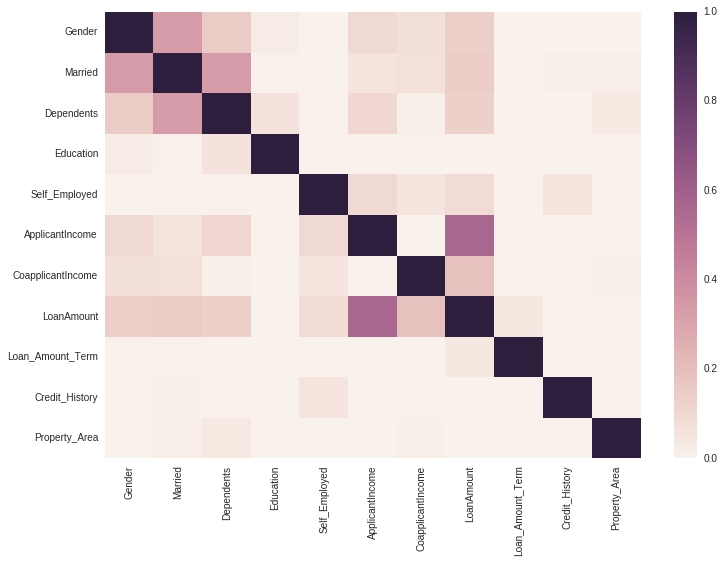

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
# For better visualization purpose , import seaborn library
import seaborn as sns
fig=plt.figure(1,figsize=(12,8))
import seaborn as sns; 
sns.set()
ax = sns.heatmap(train_df.corr(), vmin=0, vmax=1)

In [176]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 1000)
model=forest.fit(train_df, y)

In [126]:
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
574,1,1,3,0,0,6406,0.0,150.0,360.0,1.0,1
171,2,1,3,0,0,51763,0.0,700.0,300.0,1.0,2
327,1,1,0,0,1,5818,2160.0,184.0,360.0,1.0,1
252,1,0,0,1,1,2583,2167.0,104.0,360.0,1.0,0
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2


In [143]:
train_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2


In [160]:
y.head()

0    Y
1    N
2    Y
3    Y
4    Y
Name: Loan_Status, dtype: object

In [162]:
test_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,5720,0,110.0,360.0,1.000000,2
1,1,1,1,0,0,3076,1500,126.0,360.0,1.000000,2
2,1,1,2,0,0,5000,1800,208.0,360.0,1.000000,2
3,1,1,2,0,0,2340,2546,100.0,360.0,0.825444,2
4,1,0,0,1,0,3276,0,78.0,360.0,1.000000,2


In [177]:
output = model.predict(test_df)

In [178]:
submission = pd.DataFrame()
submission["Loan_ID"] = testId
submission["Loan_Status"] = output

submission.to_csv('sol.csv', index=False)

In [165]:
testId.head()

0    LP001015
1    LP001022
2    LP001031
3    LP001035
4    LP001051
Name: Loan_ID, dtype: object

In [179]:
number = preprocessing.LabelEncoder()
y = number.fit_transform(y)

In [182]:
import xgboost as xgb

In [287]:
xgtrain = xgb.DMatrix(train_df,y)
xgtest = xgb.DMatrix(test_df)

In [292]:
xgboost_params = { "objective"      :"binary:logistic",    # binary classification 
                  "eval_metric"     : "error",    # evaluation metric 
                  "nthread"         : 4,   # number of threads to be used 
                  "max_depth"       : 5,    # maximum depth of tree 
                  "eta"             : 0.15,
                  "subsample"       : 0.6815,
                  "colsample_bytree": 0.701
                  }
num_round = 50
bst = xgb.train(xgboost_params, xgtrain, num_round);

# get prediction
pred = bst.predict(xgtest);

In [308]:
element=[]

In [309]:
for i in pred:
    if(i==0):
        element.append("N")
    else:
        element.append("Y")
    

pred1 = np.asarray(element)

In [310]:
submission1 = pd.DataFrame()
submission1["Loan_ID"] = testId
submission1["Loan_Status"] = pred1

submission1.to_csv('sol2.csv', index=False)

In [299]:
bstcv=xgb.cv(xgboost_params, xgtrain, num_round,nfold=5);

In [297]:
X_train, X_test, y_train, y_test = train_test_split(train_df, y, test_size=.2)
dtrain = xgb.DMatrix(X_train, y_train)
deval = xgb.DMatrix(X_test, y_test)
watchlist = [(dtrain, 'train'), (deval, 'eval')]

In [312]:
xgboost_params = { "objective"      :"binary:logistic",    # binary classification 
                  "eval_metric"     : "error",    # evaluation metric 
                  "nthread"         : 4,   # number of threads to be used 
                  "max_depth"       : 5,    # maximum depth of tree 
                  "eta"             : 0.3,
                  "subsample"       : 0.8,
                  "colsample_bytree": 0.8
                  }
num_round = 2000
bst = xgb.train(xgboost_params, dtrain, num_round,
    evals=watchlist,
    early_stopping_rounds=250,
    verbose_eval=True);

Will train until eval error hasn't decreased in 250 rounds.
[0]	train-error:0.173116	eval-error:0.219512
[1]	train-error:0.175153	eval-error:0.219512
[2]	train-error:0.171079	eval-error:0.219512
[3]	train-error:0.160896	eval-error:0.219512
[4]	train-error:0.160896	eval-error:0.219512
[5]	train-error:0.156823	eval-error:0.219512
[6]	train-error:0.148676	eval-error:0.219512
[7]	train-error:0.142566	eval-error:0.211382
[8]	train-error:0.148676	eval-error:0.203252
[9]	train-error:0.140530	eval-error:0.211382
[10]	train-error:0.136456	eval-error:0.195122
[11]	train-error:0.116090	eval-error:0.195122
[12]	train-error:0.114053	eval-error:0.219512
[13]	train-error:0.114053	eval-error:0.227642
[14]	train-error:0.114053	eval-error:0.219512
[15]	train-error:0.101833	eval-error:0.235772
[16]	train-error:0.103870	eval-error:0.227642
[17]	train-error:0.085540	eval-error:0.227642
[18]	train-error:0.077393	eval-error:0.227642
[19]	train-error:0.079430	eval-error:0.235772
[20]	train-error:0.081466	eval

In [307]:
bst = xgb.train(xgboost_params, xgtrain, 24);

# get prediction
pred = bst.predict(xgtest);